<a href="https://colab.research.google.com/github/anhtrannguyenvan/AIO_2024_Exercise/blob/module3_finalproject/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Load dataset
import pandas as pd
df = pd.read_csv('/content/IMDB-Dataset.csv')

#remove duplicate rows
df = df.drop_duplicates()

In [34]:

num_duplicates = df.duplicated().sum()
print(f"Số lượng sample trùng lặp: {num_duplicates}")

Số lượng sample trùng lặp: 418


In [2]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.8 MB/s eta 0:00:00


In [36]:


import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions # now you can import the contractions module

stop = set(stopwords.words('english'))

#Expanding contractions
def expand_contractions(text):
  return contractions.fix(text)

#Function contractions
def preprocess_text(text):
  w1 = WordNetLemmatizer()
  soup = BeautifulSoup(text, "html.parser") #Removing htmnl tags

  text = soup.get_text()
  text = expand_contractions(text) #Expanding chatwords and contracts clearing contractions

  emoji_clean = re.compile("["
          u"\U0001F600-\U0001F64F" # emoticons
          u"\U0001F300-\U0001F5FF" # symbols & pictographs
          u"\U0001F680-\U0001F6FF" # transport & map symbols
          u"\U0001F1E0-\U0001F1FF" # flags (iOS)
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          "]+", flags =re.UNICODE)
  text = emoji_clean.sub(r'', text)
  text = re.sub(r'\.(?=\ S)', ',',text) #add space after full stop
  text = re.sub(r'http\S+', '', text) #Removing urls
  text = re.sub(r'www\S+', '', text)
  text = "".join([w1.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
  return text

df['review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-36-66bdeeac0415>:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser") #Removing htmnl tags


In [37]:
vocabulary_size = len(df)
print(f"Kích thước bộ từ điển: {vocabulary_size}")


Kích thước bộ từ điển: 49582


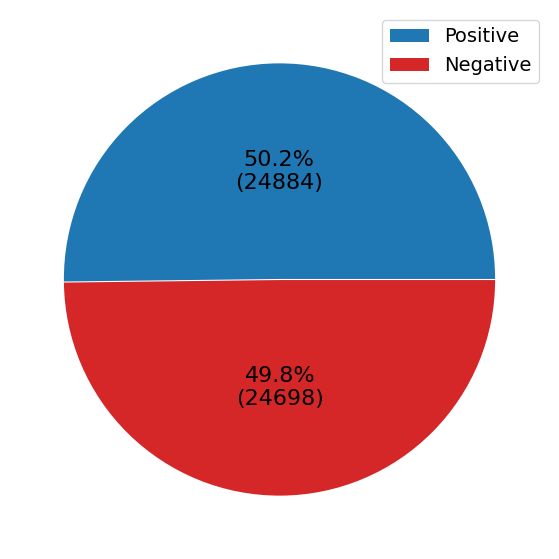

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Creating autopct arguments
def func(pct, allvalues):
  absolute = int(np.round(pct/100.*np.sum(allvalues)))
  return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]
labels = ['postive', 'negative']
#create pie chart
pie, ax  = plt.subplots(figsize=[11,7])
plt.pie(x= data, autopct=lambda pct: func(pct, data), explode=[0.0025]*2,
        pctdistance=0.5, colors=[sns.color_palette()[0], 'tab:red'], textprops={'fontsize':16})
labels = [r'Positive', r'Negative']
plt.legend(labels, loc="best", prop={'size':14})
pie.savefig("PieChart.png")
plt.show()

In [19]:
df_temp['words length'].isnull().sum()  # Kiểm tra giá trị NaN
df_temp['words length'].describe()      # Kiểm tra thống kê mô tả để tìm giá trị bất thường


,words length
count,49582.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [20]:
import seaborn as sns
print(sns.__version__)


0.13.1


In [21]:
pip install seaborn --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


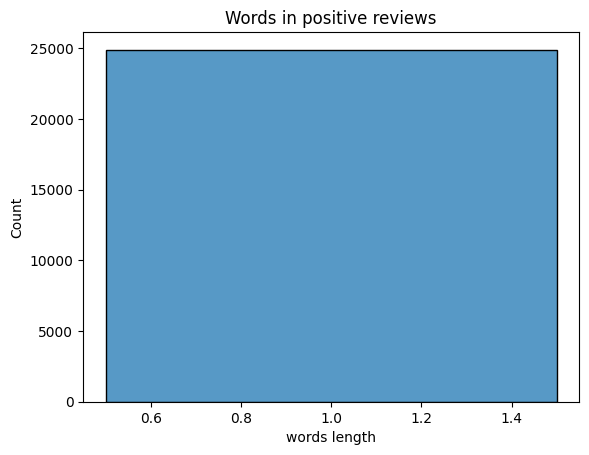

In [25]:
sns.histplot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x='words length', kde=False
).set(title='Words in positive reviews')
plt.show()


In [13]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len


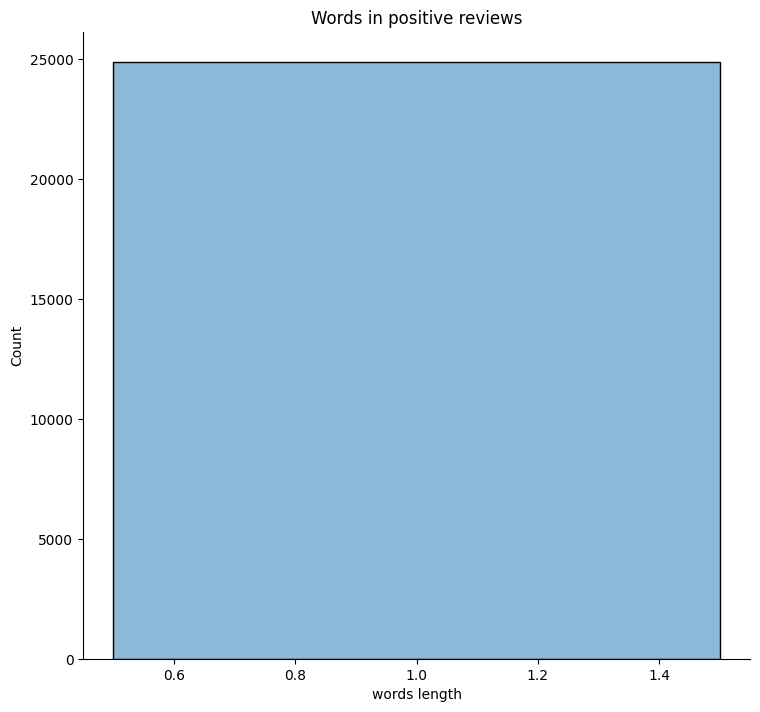

In [18]:
hist_positive = sns.displot(
    data = df_temp[df_temp['sentiment'] == 'positive'],
    x = 'words length', hue = "sentiment",
    # Remove kde = True to avoid error
    height = 7, aspect = 1.1, legend= False
).set(title='Words in positive reviews')
plt.show(hist_positive)

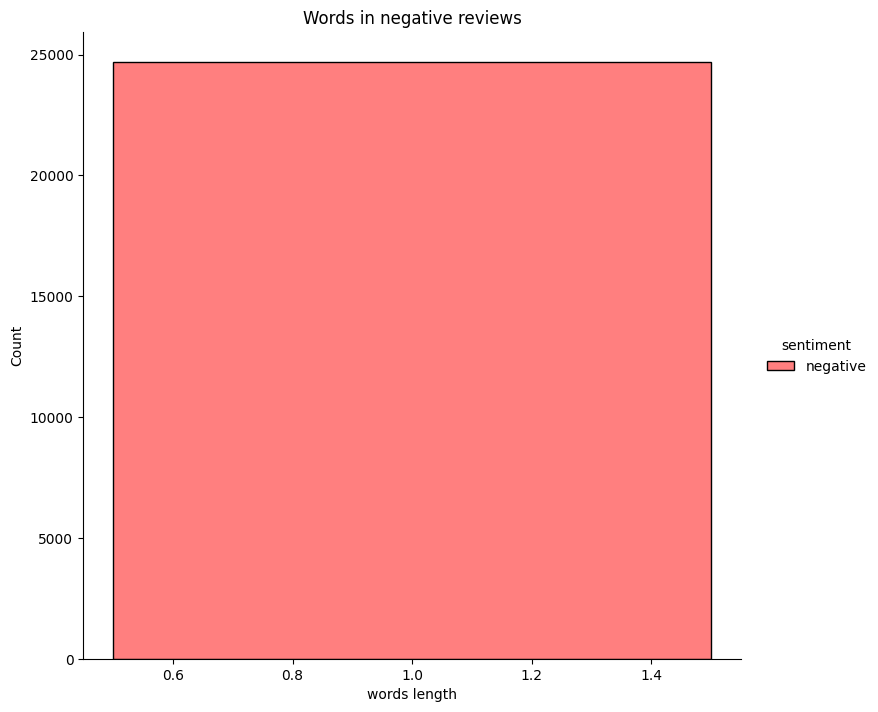

<ipython-input-27-3fec1c454065>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kernel_distibution_number_words_plot = sns.kdeplot(


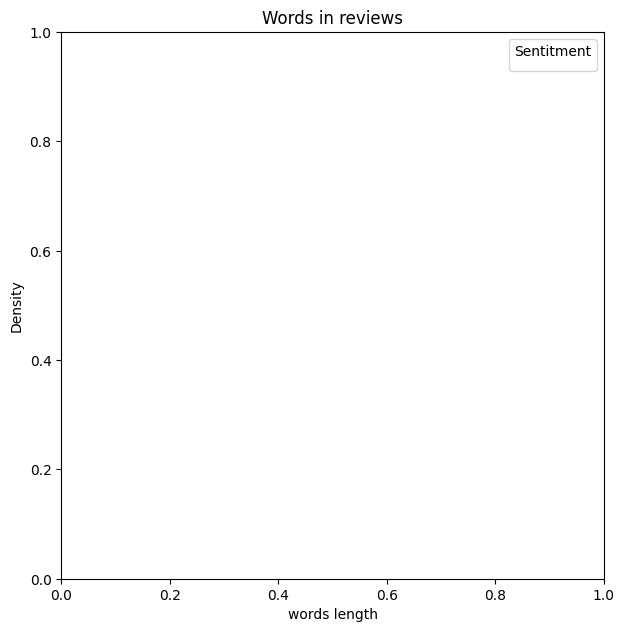

In [27]:


hist_negative = sns.displot(
    data = df_temp[df_temp['sentiment'] == 'negative'],
    x = 'words length', hue = "sentiment",
    # Remove kde = True,
    height = 7, aspect = 1.1, palette = ['red']
).set(title='Words in negative reviews')
plt.show(hist_negative)

plt.figure(figsize=(7,7.1))
kernel_distibution_number_words_plot = sns.kdeplot(
    data = df_temp, x = "words length", hue = "sentiment", fill = True,
    palette=[sns.color_palette()[0], 'red']
).set(title='Words in reviews')
plt.legend(title='Sentitment',labels=['negative', 'positive'])
plt.show(kernel_distibution_number_words_plot)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction . text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])

x_train , x_test , y_train , y_test = train_test_split (
    x_data , y_data , test_size =0.2 , random_state =42
)

NameError: name 'x_data' is not defined